### <center>Ajundasrika Anugrahanti TS</center>
#### <center>F1D022108</center>

# Here you can put your extraordinary code

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

[[253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]]


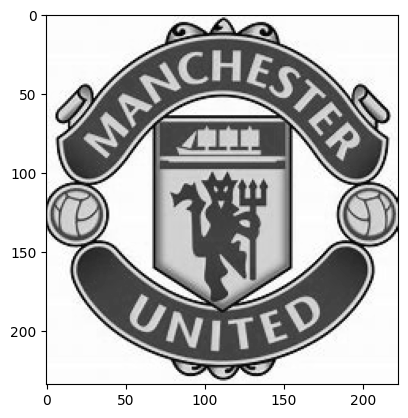

In [118]:
img1 = cv2.imread(r'C:\Users\Acer\Documents\PCD\modul-4-jurnal-Ajundasrikaa\assets\manchester_united.jpeg')
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = "gray")
print(img)

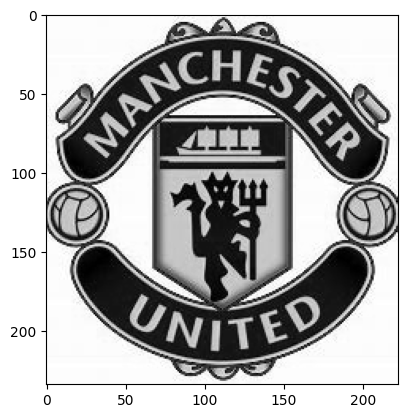

In [119]:
# Menambahkan nilai kecerahan dan kontras
alpha = 1.0  # Kontras
beta = -50  # Kecerahan (nilai negatif membuat gambar lebih gelap)

citra = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
plt.imshow(citra, cmap="gray")  

In [120]:
def konvolusi(img, kernel):
    img_height, img_width = img.shape
    kernel_size = kernel.shape[0]
    kernel_radius = kernel_size // 2
    output = np.zeros_like(img)
    
    # melakukan konvolusi
    for y in range(img_height):
        for x in range(img_width):
            value = 0
            for ky in range(kernel_size):
                for kx in range(kernel_size):
                    # mencari nilai piksel gambar dan nilai kernel yang sesuai
                    img_y = y + ky - kernel_radius
                    img_x = x + kx - kernel_radius
                    if img_y >= 0 and img_y < img_height and img_x >= 0 and img_x < img_width:
                        value += img[img_y, img_x] * kernel[ky, kx]
            output[y, x] = np.clip(value, 0, 255)  # memastikan output ada pda range [0, 255]
    
    return output

In [121]:
def meanKernel(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
    return konvolusi(img, kernel)

In [122]:
def medianKernel(img, kernel_size):
    img_height, img_width = img.shape
    kernel_radius = kernel_size // 2
    output = np.zeros_like(img)
    
    for y in range(img_height):
        for x in range(img_width):
            neighborhood = []
            for ky in range(kernel_size):
                for kx in range(kernel_size):
                    img_y = y + ky - kernel_radius
                    img_x = x + kx - kernel_radius
                    if img_y >= 0 and img_y < img_height and img_x >= 0 and img_x < img_width:
                        neighborhood.append(img[img_y, img_x])
            
            
            output[y, x] = np.median(neighborhood)
    
    return output

In [123]:
def modeKernel(img, kernel_size):
    img_height, img_width = img.shape
    kernel_radius = kernel_size // 2
    output = np.zeros_like(img)
    
    for y in range(img_height):
        for x in range(img_width):
            neighborhood = []
            for ky in range(kernel_size):
                for kx in range(kernel_size):
                    img_y = y + ky - kernel_radius
                    img_x = x + kx - kernel_radius
                    if img_y >= 0 and img_y < img_height and img_x >= 0 and img_x < img_width:
                        neighborhood.append(img[img_y, img_x])
            
            output[y, x] = np.bincount(neighborhood).argmax()
    
    return output

In [124]:
# Kernel untuk Smoothing (Mean Filter)
customKernel_smooth = np.array([[1/10, 1/10, 1/10],
                                 [1/10, 1/5, 1/10],
                                 [1/10, 1/10, 1/10]])

# Kernel untuk Sharpening
customKernel_sharpen = np.array([[1/9, 1/9, 1/9],
                                   [1/9, 8/9, 1/9],
                                   [1/9, 1/9, 1/9]])

In [125]:
def customKernel(img, kernel):
    img_height, img_width = img.shape
    kernel_size = kernel.shape[0]
    kernel_radius = kernel_size // 2
    output = np.zeros_like(img)

    for y in range(img_height):
        for x in range(img_width):
            value = 0
            for ky in range(kernel_size):
                for kx in range(kernel_size):
                    img_y = y + ky - kernel_radius
                    img_x = x + kx - kernel_radius
                    if img_y >= 0 and img_y < img_height and img_x >= 0 and img_x < img_width:
                        value += img[img_y, img_x] * kernel[ky, kx]
            output[y, x] = np.clip(value, 0, 255)

    return output

In [126]:
# Mean filter 3x3 dan 9x9 kernel
mean_3x3 = meanKernel(citra, 3)
mean_9x9 = meanKernel(citra, 9)

# Median filter 3x3 dan 9x9 kernel
median_3x3 = medianKernel(citra, 3)
median_9x9 = medianKernel(citra, 9)

# Mode filter 3x3 dan 9x9 kernel
mode_3x3 = modeKernel(citra, 3)
mode_9x9 = modeKernel(citra, 9)

In [127]:
# Menambahkan smoothing (Mean Filter) dengan kernel kustom
smoothed_image = customKernel(citra, customKernel_smooth)

# Menambahkan sharpening dengan kernel kustom
sharpened_image = customKernel(citra, customKernel_sharpen)

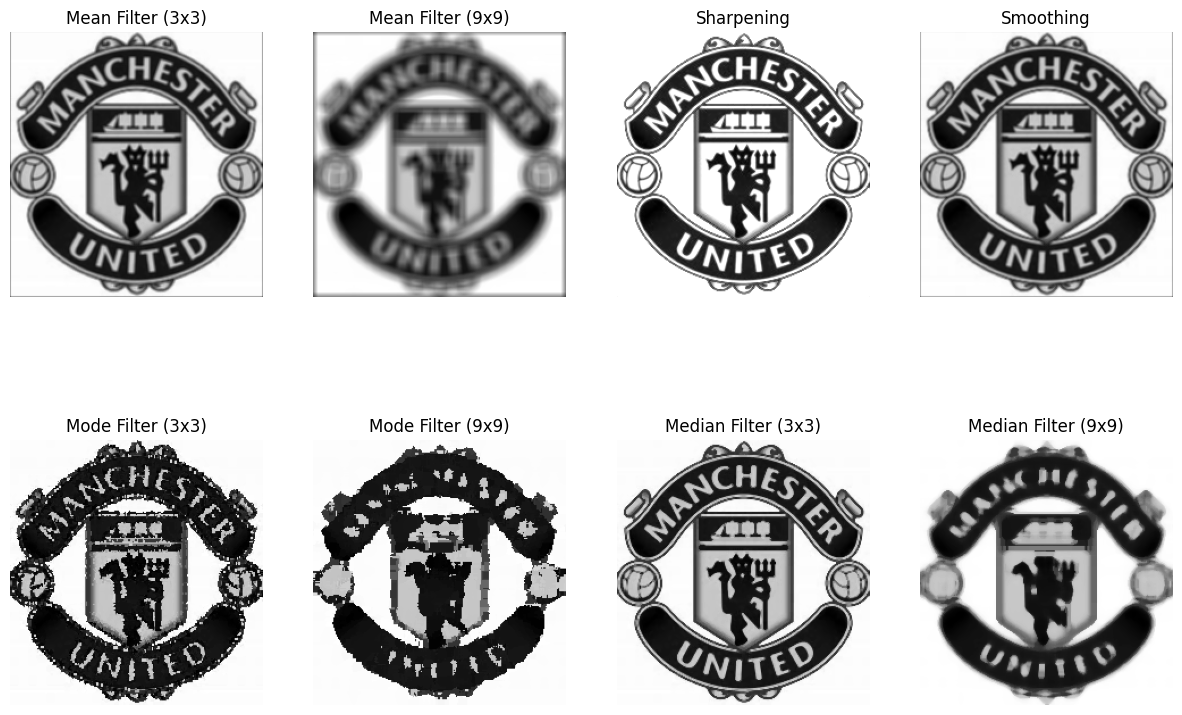

In [128]:
# Plotting the results
plt.figure(figsize=(15, 15))

plt.subplot(3, 4, 1)
plt.imshow(mean_3x3, cmap="gray")
plt.title("Mean Filter (3x3)")
plt.axis("off")

plt.subplot(3, 4, 2)
plt.imshow(mean_9x9, cmap="gray")
plt.title("Mean Filter (9x9)")
plt.axis("off")

plt.subplot(3, 4, 3)
plt.imshow(sharpened_image, cmap="gray")
plt.title("Sharpening")
plt.axis("off")

plt.subplot(3, 4, 4)
plt.imshow(smoothed_image, cmap="gray")
plt.title("Smoothing")
plt.axis("off")

plt.subplot(3, 4, 5)
plt.imshow(mode_3x3, cmap="gray")
plt.title("Mode Filter (3x3)")
plt.axis("off")

plt.subplot(3, 4, 6)
plt.imshow(mode_9x9, cmap="gray")
plt.title("Mode Filter (9x9)")
plt.axis("off")

plt.subplot(3, 4, 7)
plt.imshow(median_3x3, cmap="gray")
plt.title("Median Filter (3x3)")
plt.axis("off")

plt.subplot(3, 4, 8)
plt.imshow(median_9x9, cmap="gray")
plt.title("Median Filter (9x9)")
plt.axis("off")

plt.show()

In [129]:
sobelx=np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]
               ])

sobely=np.array([[1, 2, 1],
                [0, 0, 0],
                [-1, -2, -1]
                ])

In [130]:
def metodeSobel(matriks, kernel):
    arr_tam = np.zeros(matriks.shape)
    for i in range(1, matriks.shape[0]-1):
        for j in range(1, matriks.shape[1]-1):  
            x_kernel = 0
            for k in range(i-1, i+2):
                y_kernel = 0
                for l in range(j-1, j+2):
                    arr_tam[i][j] += matriks[k][l] * kernel[x_kernel][y_kernel]
                    y_kernel+=1
                x_kernel+=1
    return arr_tam

def final (y, x):
    hasil = abs(y) + abs(x)
    return hasil

In [131]:
# filter mean 3x3
mean3x3_sobelx = metodeSobel(mean_3x3, sobelx)
mean3x3_sobely = metodeSobel(mean_3x3, sobely)
sobel_mean_3x3 = final(mean3x3_sobelx, mean3x3_sobely)

# filter mean 9x9
mean9x9_sobelx = metodeSobel(mean_9x9, sobelx)
mean9x9_sobely = metodeSobel(mean_9x9, sobely)
sobel_mean_9x9 = final(mean9x9_sobelx, mean9x9_sobely)

# sharpening
sharpened_sobelx = metodeSobel(sharpened_image, sobelx)
sharpened_sobely = metodeSobel(sharpened_image, sobely)
sobelSharpen = final(sharpened_sobelx, sharpened_sobely)

# smoothing
smoothed_sobelx = metodeSobel(smoothed_image, sobelx)
smoothed_sobely = metodeSobel(smoothed_image, sobely)
sobelSmooth = final(smoothed_sobelx, smoothed_sobely)

# modus 3x3
mode3x3_sobelx = metodeSobel(mode_3x3, sobelx)
mode3x3_sobely = metodeSobel(mode_3x3, sobely)
sobelMode_3x3 = final(mode3x3_sobelx, mode3x3_sobely)

# modus 9x9
mode9x9_sobelx = metodeSobel(mode_9x9, sobelx)
mode9x9_sobely = metodeSobel(mode_9x9, sobely)
sobelMode_9x9 = final(mode9x9_sobelx, mode9x9_sobely)

# median 3x3
median3x3_sobelx = metodeSobel(median_3x3, sobelx)
median3x3_sobely = metodeSobel(median_3x3, sobely)
sobelMedian_3x3 = final(median3x3_sobelx, median3x3_sobely)

# median 9x9
median9x9_sobelx = metodeSobel(median_9x9, sobelx)
median9x9_sobely = metodeSobel(median_9x9, sobely)
sobelMedian_9x9 = final(median9x9_sobelx, median9x9_sobely)  

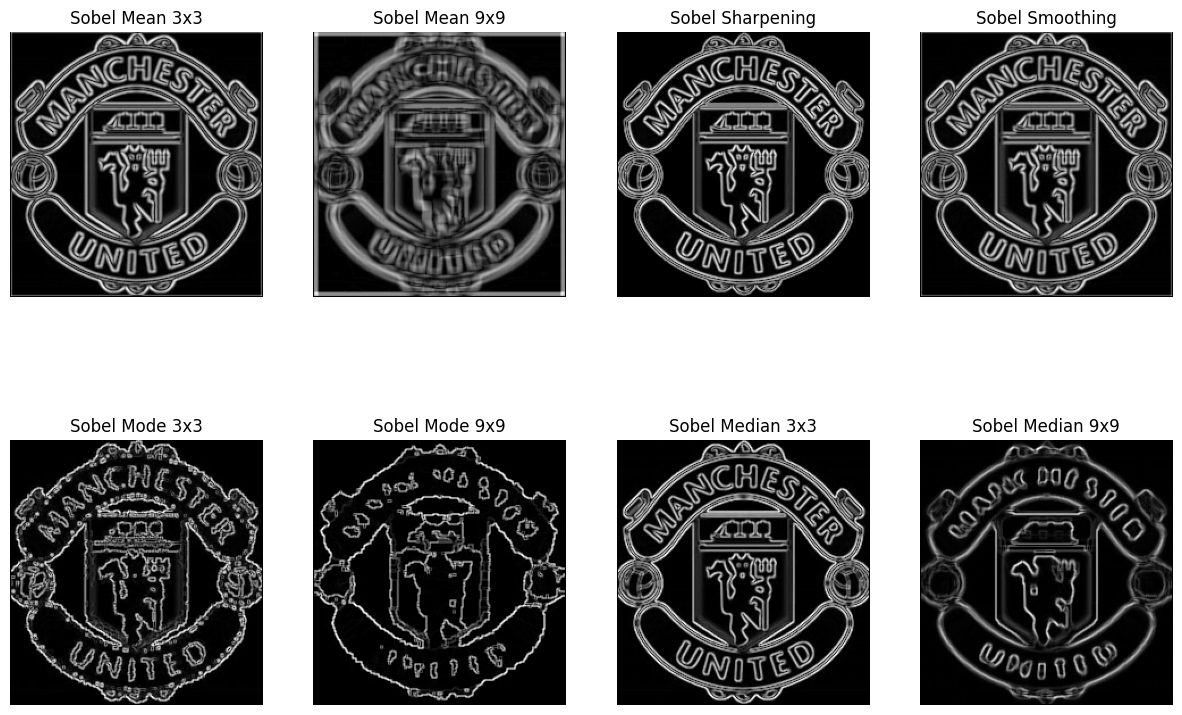

In [132]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 4, 1)
plt.imshow(sobel_mean_3x3, cmap="gray")
plt.title("Sobel Mean 3x3")
plt.axis("off")
plt.subplot(3, 4, 2)
plt.imshow(sobel_mean_9x9, cmap="gray")
plt.title("Sobel Mean 9x9")
plt.axis("off")
plt.subplot(3, 4, 3)
plt.imshow(sobelSharpen, cmap="gray")
plt.title("Sobel Sharpening")
plt.axis("off")
plt.subplot(3, 4, 4)
plt.imshow(sobelSmooth, cmap="gray")
plt.title("Sobel Smoothing")   
plt.axis("off")
plt.subplot(3, 4, 5)
plt.imshow(sobelMode_3x3, cmap="gray")
plt.title("Sobel Mode 3x3")
plt.axis("off")
plt.subplot(3, 4, 6)
plt.imshow(sobelMode_9x9, cmap="gray")
plt.title("Sobel Mode 9x9")
plt.axis("off")
plt.subplot(3, 4, 7)
plt.imshow(sobelMedian_3x3, cmap="gray")
plt.title("Sobel Median 3x3")
plt.axis("off")
plt.subplot(3, 4, 8)
plt.imshow(sobelMedian_9x9, cmap="gray")
plt.title("Sobel Median 9x9")
plt.axis("off")

plt.show()

In [133]:
px = np.array([[-1, 0, 1],
                [-1, 0, 1],
                [-1, 0, 1]
               ])

py = np.array([[-1, -1, -1],
                [0, 0, 0],
                [1, 1, 1]
                ])

In [134]:
def prewitt(matriks, kernel):
    arr_tam = np.zeros(matriks.shape)
    for i in range(1, matriks.shape[0]-1):
        for j in range(1, matriks.shape[1]-1):  
            x_kernel = 0
            for k in range(i-1, i+2):
                y_kernel = 0
                for l in range(j-1, j+2):
                    arr_tam[i][j] += matriks[k][l] * kernel[x_kernel][y_kernel]
                    y_kernel+=1
                x_kernel+=1
    return arr_tam

In [135]:
# filter mean 3x3
mean3x3_prewittx = prewitt(mean_3x3, px)
mean3x3_prewitty = prewitt(mean_3x3, py)
prewittmean_3x3 = final(mean3x3_prewittx, mean3x3_prewitty)

# filter mean 9x9
mean9x9_prewittx = prewitt(mean_9x9, px)
mean9x9_prewitty = prewitt(mean_9x9, py)
prewittmean_9x9 = final(mean9x9_prewittx, mean9x9_prewitty)

# sharpening
sharpened_prewittx = prewitt(sharpened_image, px)
sharpened_prewitty = prewitt(sharpened_image, py)
prewittsharpen = final(sharpened_prewittx, sharpened_prewitty)

# smoothing
smoothed_prewittx = prewitt(smoothed_image, px)
smoothed_prewitty = prewitt(smoothed_image, py)
prewittsmooth = final(smoothed_prewittx, smoothed_prewitty)

# modus 3x3
mode3x3_prewittx = prewitt(mode_3x3, px)
mode3x3_prewitty = prewitt(mode_3x3, py)
prewittmode_3x3 = final(mode3x3_prewittx, mode3x3_prewitty)

# modus 9x9
mode9x9_prewittx = prewitt(mode_9x9, px)
mode9x9_prewitty = prewitt(mode_9x9, py)
prewittmode_9x9 = final(mode9x9_prewittx, mode9x9_prewitty)

# median 3x3
median3x3_prewittx = prewitt(median_3x3, px)
median3x3_prewitty = prewitt(median_3x3, py)
prewittmedian_3x3 = final(median3x3_prewittx, median3x3_prewitty)

# median 9x9
median9x9_prewittx = prewitt(median_9x9, px)
median9x9_prewitty = prewitt(median_9x9, py)
prewittmedian_9x9 = final(median9x9_prewittx, median9x9_prewitty)

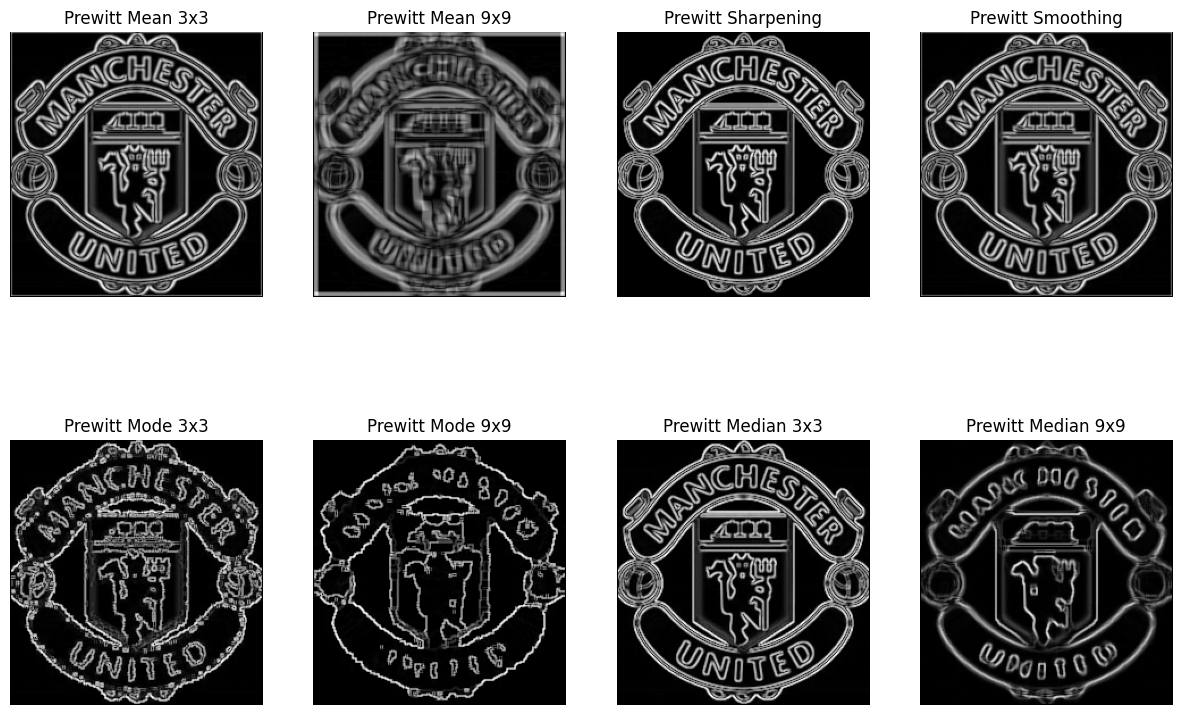

In [136]:
plt.figure(figsize=(15, 15))    

plt.subplot(3, 4, 1)
plt.imshow(prewittmean_3x3, cmap="gray")
plt.title("Prewitt Mean 3x3")
plt.axis("off")
plt.subplot(3, 4, 2)
plt.imshow(prewittmean_9x9, cmap="gray")
plt.title("Prewitt Mean 9x9")
plt.axis("off")
plt.subplot(3, 4, 3)
plt.imshow(prewittsharpen, cmap="gray")
plt.title("Prewitt Sharpening")
plt.axis("off")
plt.subplot(3, 4, 4)
plt.imshow(prewittsmooth, cmap="gray")
plt.title("Prewitt Smoothing")
plt.axis("off")
plt.subplot(3, 4, 5)
plt.imshow(prewittmode_3x3, cmap="gray")
plt.title("Prewitt Mode 3x3")
plt.axis("off")
plt.subplot(3, 4, 6)
plt.imshow(prewittmode_9x9, cmap="gray")
plt.title("Prewitt Mode 9x9")
plt.axis("off")
plt.subplot(3, 4, 7)
plt.imshow(prewittmedian_3x3, cmap="gray")
plt.title("Prewitt Median 3x3")
plt.axis("off")
plt.subplot(3, 4, 8)
plt.imshow(prewittmedian_9x9, cmap="gray")
plt.title("Prewitt Median 9x9")
plt.axis("off")

plt.show()

In [137]:
rx = np.array ([[1,0], [0,-1]])
ry = np.array ([[0,1], [-1,0]])

In [138]:
def konvRoberts (c, k):
    baris, kolom = c.shape
    hasil = np.zeros (c.shape)
    for i in range(baris-1):
        for j in range(kolom-1):
            hasil[i,j]=c[i,j]*k[0,0]+c[i,j+1]*k[0,1]+c[i+1,j]*k[1,0]+c[i+1,j+1]*k[1,1]
    return hasil

In [139]:
def finalRoberts (sumbu_x, sumbu_y):
    hasil = np.sqrt (pow(sumbu_x,2)+pow(sumbu_y,2))
    return hasil

In [140]:
# mean 3x3
mean3x3_robertsx = konvRoberts(mean_3x3, rx)
mean3x3_robertsy = konvRoberts(mean_3x3, ry)
robertsmean_3x3 = finalRoberts(mean3x3_robertsx, mean3x3_robertsy)

# mean 9x9
mean9x9_robertsx = konvRoberts(mean_9x9, rx)
mean9x9_robertsy = konvRoberts(mean_9x9, ry)
robertsmean_9x9 = finalRoberts(mean9x9_robertsx, mean9x9_robertsy)

# sharpening
sharpened_robertsx = konvRoberts(sharpened_image, rx)
sharpened_robertsy = konvRoberts(sharpened_image, ry)
robertssharpen = finalRoberts(sharpened_robertsx, sharpened_robertsy)

# smoothing
smoothed_robertsx = konvRoberts(smoothed_image, rx)
smoothed_robertsy = konvRoberts(smoothed_image, ry)
robertssmooth = finalRoberts(smoothed_robertsx, smoothed_robertsy)

# modus 3x3
mode3x3_robertsx = konvRoberts(mode_3x3, rx)
mode3x3_robertsy = konvRoberts(mode_3x3, ry)
robertsmodus_3x3 = finalRoberts(mode3x3_robertsx, mode3x3_robertsy)

# modus 9x9
mode9x9_robertsx = konvRoberts(mode_9x9, rx)
mode9x9_robertsy = konvRoberts(mode_9x9, ry)
robertsmodus_9x9 = finalRoberts(mode9x9_robertsx, mode9x9_robertsy)

# median 3x3
median3x3_robertsx = konvRoberts(median_3x3, rx)
median3x3_robertsy = konvRoberts(median_3x3, ry)
robertsmedian_3x3 = finalRoberts(median3x3_robertsx, median3x3_robertsy)

# median 9x9
median9x9_robertsx = konvRoberts(median_9x9, rx)
median9x9_robertsy = konvRoberts(median_9x9, ry)
robertsmedian_9x9 = finalRoberts(median9x9_robertsx, median9x9_robertsy)

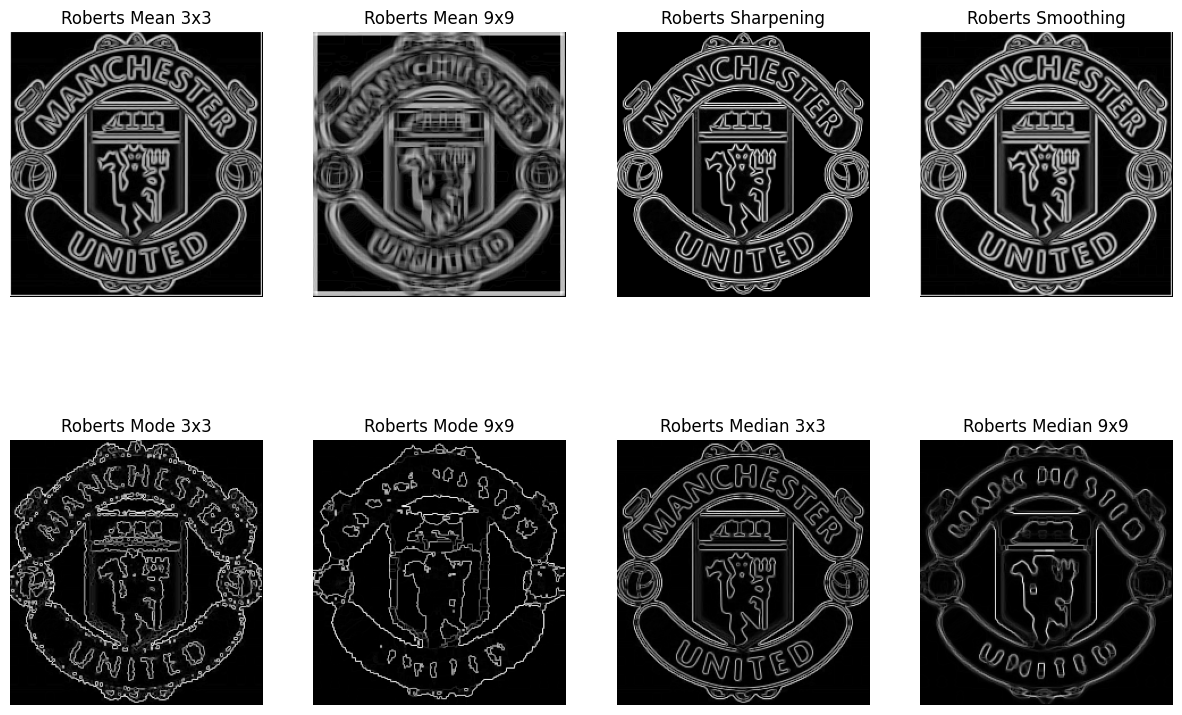

In [141]:
# Plot Hasil
plt.figure(figsize=(15, 15))    

plt.subplot(3, 4, 1)
plt.imshow(robertsmean_3x3, cmap="gray")
plt.title("Roberts Mean 3x3")
plt.axis("off")
plt.subplot(3, 4, 2)
plt.imshow(robertsmean_9x9, cmap="gray")
plt.title("Roberts Mean 9x9")
plt.axis("off")
plt.subplot(3, 4, 3)
plt.imshow(robertssharpen, cmap="gray")
plt.title("Roberts Sharpening")
plt.axis("off")
plt.subplot(3, 4, 4)
plt.imshow(robertssmooth, cmap="gray")
plt.title("Roberts Smoothing")
plt.axis("off")
plt.subplot(3, 4, 5)
plt.imshow(robertsmodus_3x3, cmap="gray")
plt.title("Roberts Mode 3x3")
plt.axis("off")
plt.subplot(3, 4, 6)
plt.imshow(robertsmodus_9x9, cmap="gray")
plt.title("Roberts Mode 9x9")
plt.axis("off")
plt.subplot(3, 4, 7)
plt.imshow(robertsmedian_3x3, cmap="gray")
plt.title("Roberts Median 3x3")
plt.axis("off") 
plt.subplot(3, 4, 8)
plt.imshow(robertsmedian_9x9, cmap="gray")
plt.title("Roberts Median 9x9")
plt.axis("off")

plt.show()